<a href="https://colab.research.google.com/github/ladkrutarth/PDS_-FInal_Project/blob/main/Cole's_COMP_SCI_5530_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

Storing raw data, and getting some preliminary info.



In [ ]:
raw_df = pd.read_csv('/content/drive/MyDrive/diabetic_data.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

If we look at this, we see much of weight is labeled as "?".

In [ ]:
raw_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


We see how much is labeled "?"

In [ ]:
raw_df.weight.value_counts()

,count
weight,
?,98569
[75-100),1336
[50-75),897
[100-125),625
[125-150),145
[25-50),97
[0-25),48
[150-175),35
[175-200),11


Notice the vast majority of weight is unknown. Plus it is a categorical variable. In this case, we drop the column. We also drop encounter_id and patient_nbr since these will not be relevant to whether a patient is readmitted or not. This shows us more "?". So we will now see how much there are for each variable

In [ ]:
clean_df_dummy = raw_df.drop(['encounter_id', 'patient_nbr', 'weight'], axis=1)
clean_df_dummy

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,MC,?,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,MC,?,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,MC,?,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,MC,Surgery-General,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


We see how many '?' is in each column.

In [ ]:
(clean_df_dummy == '?').sum()

,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
payer_code,40256
medical_specialty,49949
num_lab_procedures,0


We drop payer_code and medical_speciality since they are categorical and almost half of the values are '?'. We also drop the rows where there are missing values for diag_1, diag_2, and diag_3, and race. We also see that max_glu_serum and A1Cresult have NaN values. We leave these, firstly due to the  amount we would have to delete, but also because the NaN just means the test was not taken. The data is not missing.

In [ ]:
clean_df_dummy2 = clean_df_dummy.drop(['payer_code', 'medical_specialty',], axis=1)
cleaned_df = clean_df_dummy2.replace('?', np.nan).dropna(subset=['diag_1', 'diag_2', 'diag_3', 'race'])
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98053 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      98053 non-null  object
 1   gender                    98053 non-null  object
 2   age                       98053 non-null  object
 3   admission_type_id         98053 non-null  int64 
 4   discharge_disposition_id  98053 non-null  int64 
 5   admission_source_id       98053 non-null  int64 
 6   time_in_hospital          98053 non-null  int64 
 7   num_lab_procedures        98053 non-null  int64 
 8   num_procedures            98053 non-null  int64 
 9   num_medications           98053 non-null  int64 
 10  number_outpatient         98053 non-null  int64 
 11  number_emergency          98053 non-null  int64 
 12  number_inpatient          98053 non-null  int64 
 13  diag_1                    98053 non-null  object
 14  diag_2                    

In [ ]:
cleaned_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,NO


This shows us that about 47% of patients were readmitted.

In [ ]:
((cleaned_df.readmitted == '>30').sum()+ (cleaned_df.readmitted == '<30').sum()) / (cleaned_df.readmitted).count()

np.float64(0.46622744842075203)

About 35% were readmitted in more than 30 days.

In [ ]:
((cleaned_df.readmitted == '>30').sum()) / (cleaned_df.readmitted).count()

np.float64(0.3533701161616677)

About 11% of

In [ ]:
((cleaned_df.readmitted == '<30').sum()) / (cleaned_df.readmitted).count()

np.float64(0.11285733225908437)

Replaces Readmitted with true for <30 and false for other values. Then creates a numerical and bool df.

In [ ]:
cleaned_df.readmitted.replace(['<30', '>30','NO'], [True, False, False], inplace=True)
Num_Bool_df = cleaned_df.select_dtypes(include=[np.number, 'bool'])
Num_Bool_df

<ipython-input-13-ac224c5e0a3c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df.readmitted.replace(['<30', '>30','NO'], [True, False, False], inplace=True)
<ipython-input-13-ac224c5e0a3c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_df.readmitted.replace(['<30', '>30','NO'], 

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,1,1,7,3,59,0,18,0,0,0,9,False
2,1,1,7,2,11,5,13,2,0,1,6,False
3,1,1,7,2,44,1,16,0,0,0,7,False
4,1,1,7,1,51,0,8,0,0,0,5,False
5,2,1,2,3,31,6,16,0,0,0,9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,9,False
101762,1,4,5,5,33,3,18,0,0,1,9,False
101763,1,1,7,1,53,0,9,1,0,0,13,False
101764,2,3,7,10,45,2,21,0,0,1,9,False


This is a heat map with all the variables vs readmitted. We do not see a linear relationship between between them.

(44.0, 45.0)

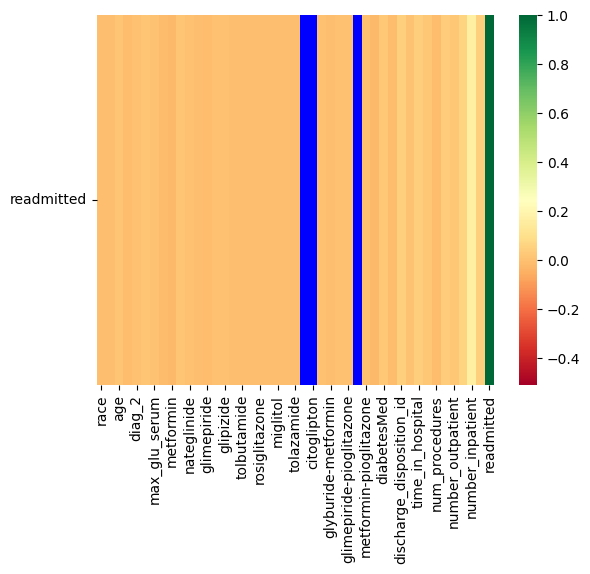

In [ ]:
Object_df = cleaned_df.select_dtypes(include=['object'])
Category_df = Object_df.astype('category')

columns = Category_df.columns
for column in columns:
  Category_df[column] = Category_df[column].cat.codes
numeric_df = pd.concat([Category_df, Num_Bool_df], axis=1)
numeric_df['readmitted'] = numeric_df['readmitted'].astype(int)
color = plt.get_cmap('RdYlGn')
color.set_bad('blue')
sns.heatmap(numeric_df.corr(), cmap=color)
plt.ylim(44,45)

A scatter plot between readmitted vs every other variable. Nothing here tells us important information here besides the last plot which hints at the fact that our data set is biased. For the next step, which is modeling, we must change that.



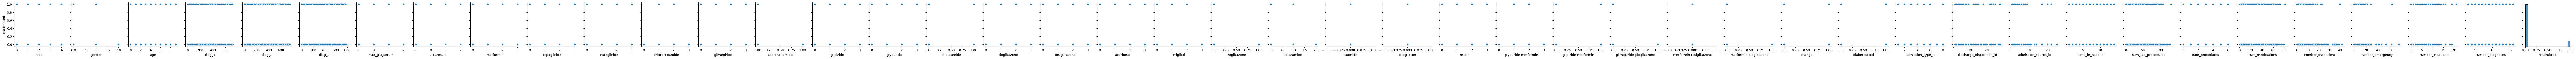

In [ ]:
sns.pairplot(numeric_df, y_vars='readmitted')

In [ ]:
X = numeric_df.drop('readmitted', axis=1)
y = numeric_df.readmitted

smote = SMOTE(sampling_strategy='minority', random_state=40)
X, y = smote.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

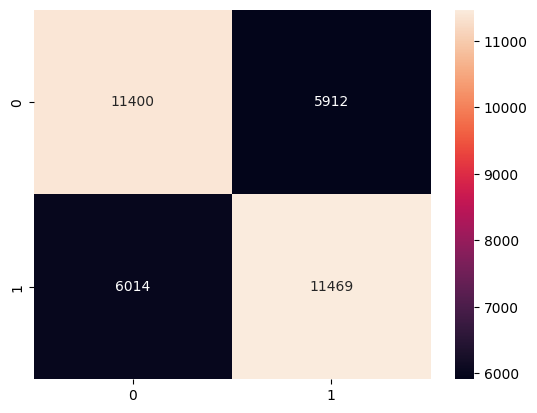

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')

In [ ]:
target_names = ['Not Readmitted', 'Readmitted']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Readmitted       0.65      0.66      0.66     17312
    Readmitted       0.66      0.66      0.66     17483

      accuracy                           0.66     34795
     macro avg       0.66      0.66      0.66     34795
  weighted avg       0.66      0.66      0.66     34795



In [ ]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)
y_pred = tree_clf.predict(x_test)

<Axes: >

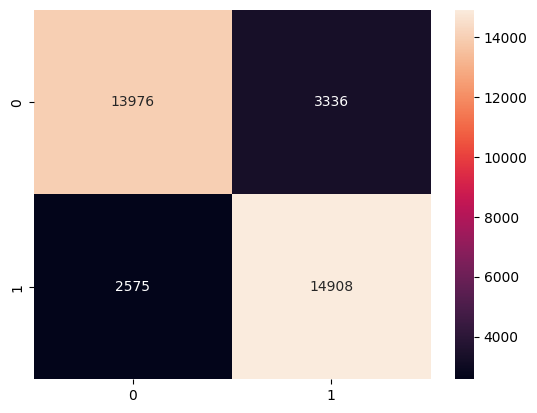

In [ ]:
tree_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(tree_cnf_matrix, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Readmitted       0.84      0.81      0.83     17312
    Readmitted       0.82      0.85      0.83     17483

      accuracy                           0.83     34795
     macro avg       0.83      0.83      0.83     34795
  weighted avg       0.83      0.83      0.83     34795



In [ ]:
RF_clf = RandomForestClassifier()
RF_clf.fit(x_train, y_train)
y_pred = RF_clf.predict(x_test)

<Axes: >

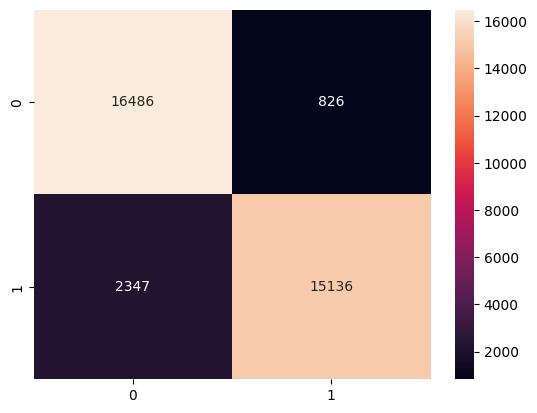

In [ ]:
RF_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(RF_cnf_matrix, annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Not Readmitted       0.88      0.95      0.91     17312
    Readmitted       0.95      0.87      0.91     17483

      accuracy                           0.91     34795
     macro avg       0.91      0.91      0.91     34795
  weighted avg       0.91      0.91      0.91     34795



<Axes: title={'center': 'Feature Importance'}, ylabel='Feature'>

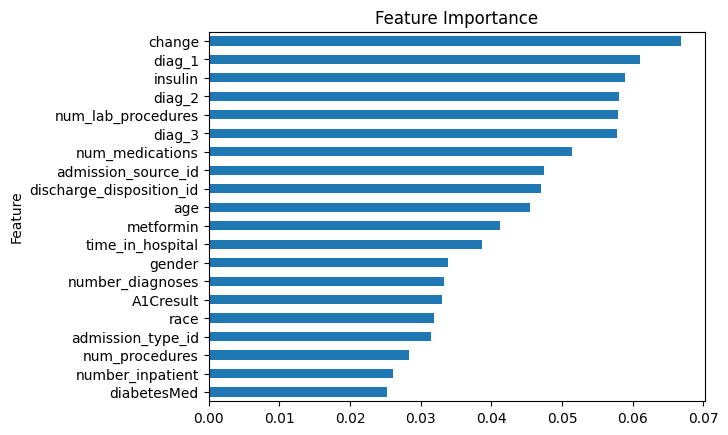

In [ ]:
importances = RF_clf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values()
plt.title('Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
forest_importances['diabetesMed':'change'].plot.barh()


In [ ]:
def RiskScore(df):
  RiskScoreMatrix = np.empty(len(df), dtype='object')
  for i in range(len(df)):
    if(RF_clf.predict_proba(df)[i,1] >= .90):
      RiskScoreMatrix[i] = 'High'
    elif(RF_clf.predict_proba(df)[i,1] >= .70):
      RiskScoreMatrix[i] = 'Medium'
    else:
      RiskScoreMatrix[i] = 'Low'
  return RiskScoreMatrix

In [ ]:
RiskScore(x_test[0:1])

array(['Low'], dtype=object)

In [1]:
RiskScore(x_test[0:5])

NameError: name 'RiskScore' is not defined